# Customer Segmentation

* In this project, I will conduct unsupervised clustering analysis using customer data obtained from a grocery firm's database. Customer segmentation is pivotal for categorizing customers into meaningful groups based on similarities within each cluster. This approach enables the optimization of customer interactions and product offerings tailored to diverse customer needs and behaviors.

* By leveraging customer segmentation, the grocery firm can foster stronger customer relationships, improve operational efficiency, and drive sustainable business growth in a competitive market landscape.

### About this file

* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

* Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment


### Import the required libraries

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Import the data and show observations 

In [6]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [7]:
# columns information

data.info()

# There are columns datatypes which needs to be changed like dt_customer should be converted in date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
# Checking for missing or null values

data.isnull().sum()/len(data)

# There are 24 missing values in Income dataset so we can drop or impute these values.


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [17]:
# We decide to drop the null values as the missing values percentage is 0.0107

data=data.dropna()

data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [22]:
# Changing the datatypes of dt_customer

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='%d-%m-%Y')
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [23]:
# Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


### Feature Engineering

In [24]:
# Lets check the all columns and do needful feature enginnering

data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [34]:
# There are columns names which are hard to understand so we can rename these columns as per our understanding
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [26]:
# we can create a new column age by Year birth

data['Age']=2021-data['Year_Birth']

In [28]:
# We can take the sum of various items in data to retriveing the total amount spent by customers

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [29]:
# We can also create a new column by marital status

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
                                                    "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 
                                                    "Divorced":"Alone", "Single":"Alone",})

In [30]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [31]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [32]:
# Feature parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [33]:
# We can divide the education levels in three groups  
# Basic,2n cycle: undergraduate   Graduation: graduate, Master,PHD: Postgraduate
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", 
                                             "Master":"Postgraduate", "PhD":"Postgraduate"})

In [36]:
# We can drop the some columns which may not good for further analysis

for i in data.columns:
    print(data[i].value_counts())

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: count, Length: 2216, dtype: int64
Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      

In [37]:
# Dropping the columns

drop_col= ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(drop_col, axis=1)

In [38]:
# Lets see the descriptive analysis of above codes perform

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


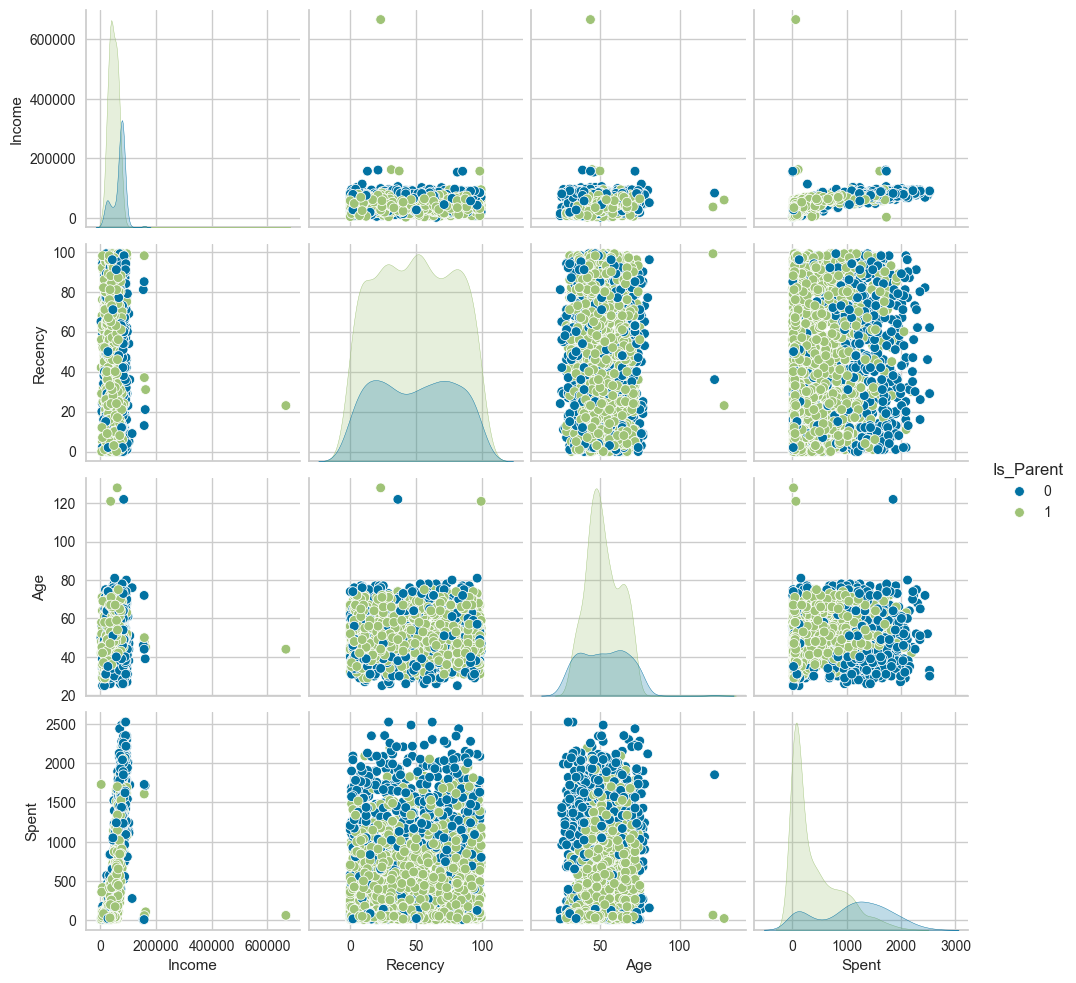

In [43]:
# Lets plot the scatterplot to see the relation between variables

plot=[ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(data[plot], hue= "Is_Parent")
 
plt.show()

#### Based on the scatter plots and histograms in the above, here are some inferences:

** Income vs Spent
* There appears to be a positive correlation between ‘Income’ and ‘Spent,’ indicating that higher income is associated with higher spending.


** Age Distribution
* The histogram for ‘Age’ shows that most individuals fall within a specific age range, suggesting a concentration of data points around certain ages


** Recency vs Frequency
*The scatter plot between ‘Recency’ and ‘Frequency’ might indicate a relationship where more recent interactions are associated with higher frequency.


** Group Differences
* The two distinct groups (blue and green dots) likely represent different segments, such as ‘Is_Parent’ with values 0 and 1, showing variations in behavior or characteristics between these groups.

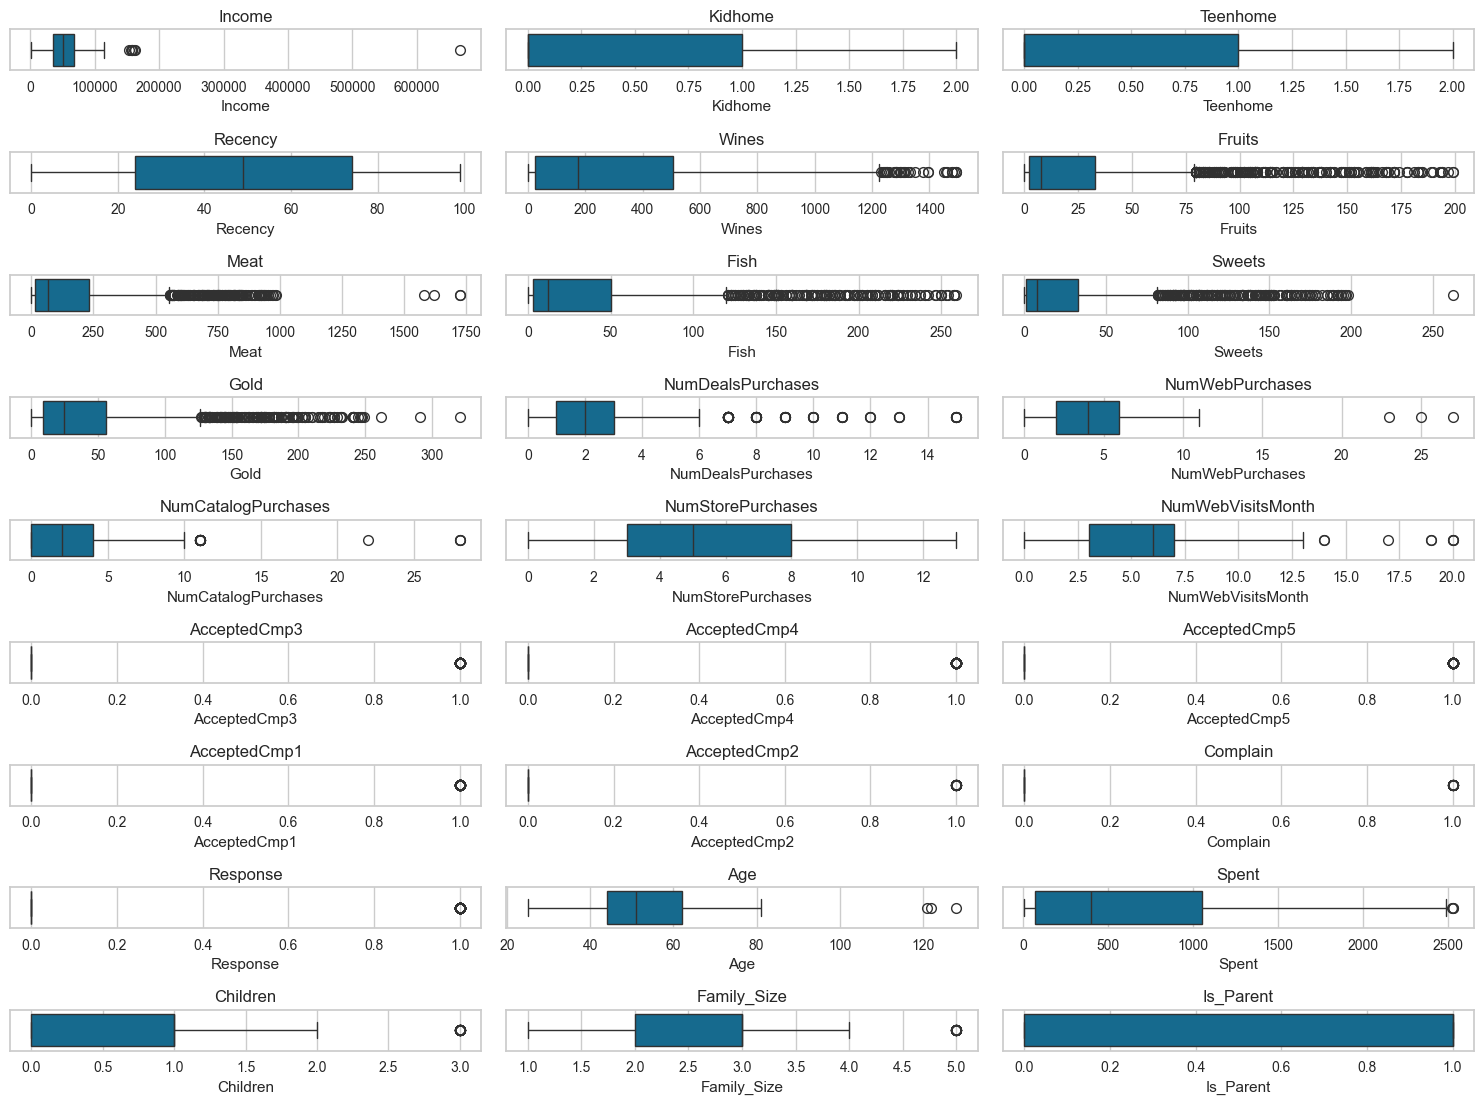

In [55]:
# lets check for the outliers in dataset
# For unsupervised learning, you don’t need to create outliers but here we can cap the outliers for age


t=1
plt.figure(figsize=(15,12))
for i in data.select_dtypes(np.number):
    plt.subplot(10,3,t)
    sns.boxplot(data[i],orient='h')
    plt.title(i)
    t+=1
    
plt.tight_layout()
plt.show()

#### Based on the box plots in the above code, here are the relevant inferences:

** Income
*The distribution of income shows a wide range, with some outliers indicating very high incomes.


** Amount Spent on Wines (MntWines)
* There is a significant variation in spending on wines, with a few customers spending much more than the average.


** Number of Web Purchases (NumWebPurchases)
* Most customers have made a moderate number of web purchases, with a few making a very high number.


** Complaints (Complain)
* The majority of customers have not complained in the last two years, as indicated by the box plot.

In [57]:
# As per descriptive analysis, we have noticeed that the maximum age is 128, 
# so we should need to cap the outliers of age columns, lets take 90

data = data[(data["Age"]<90)]



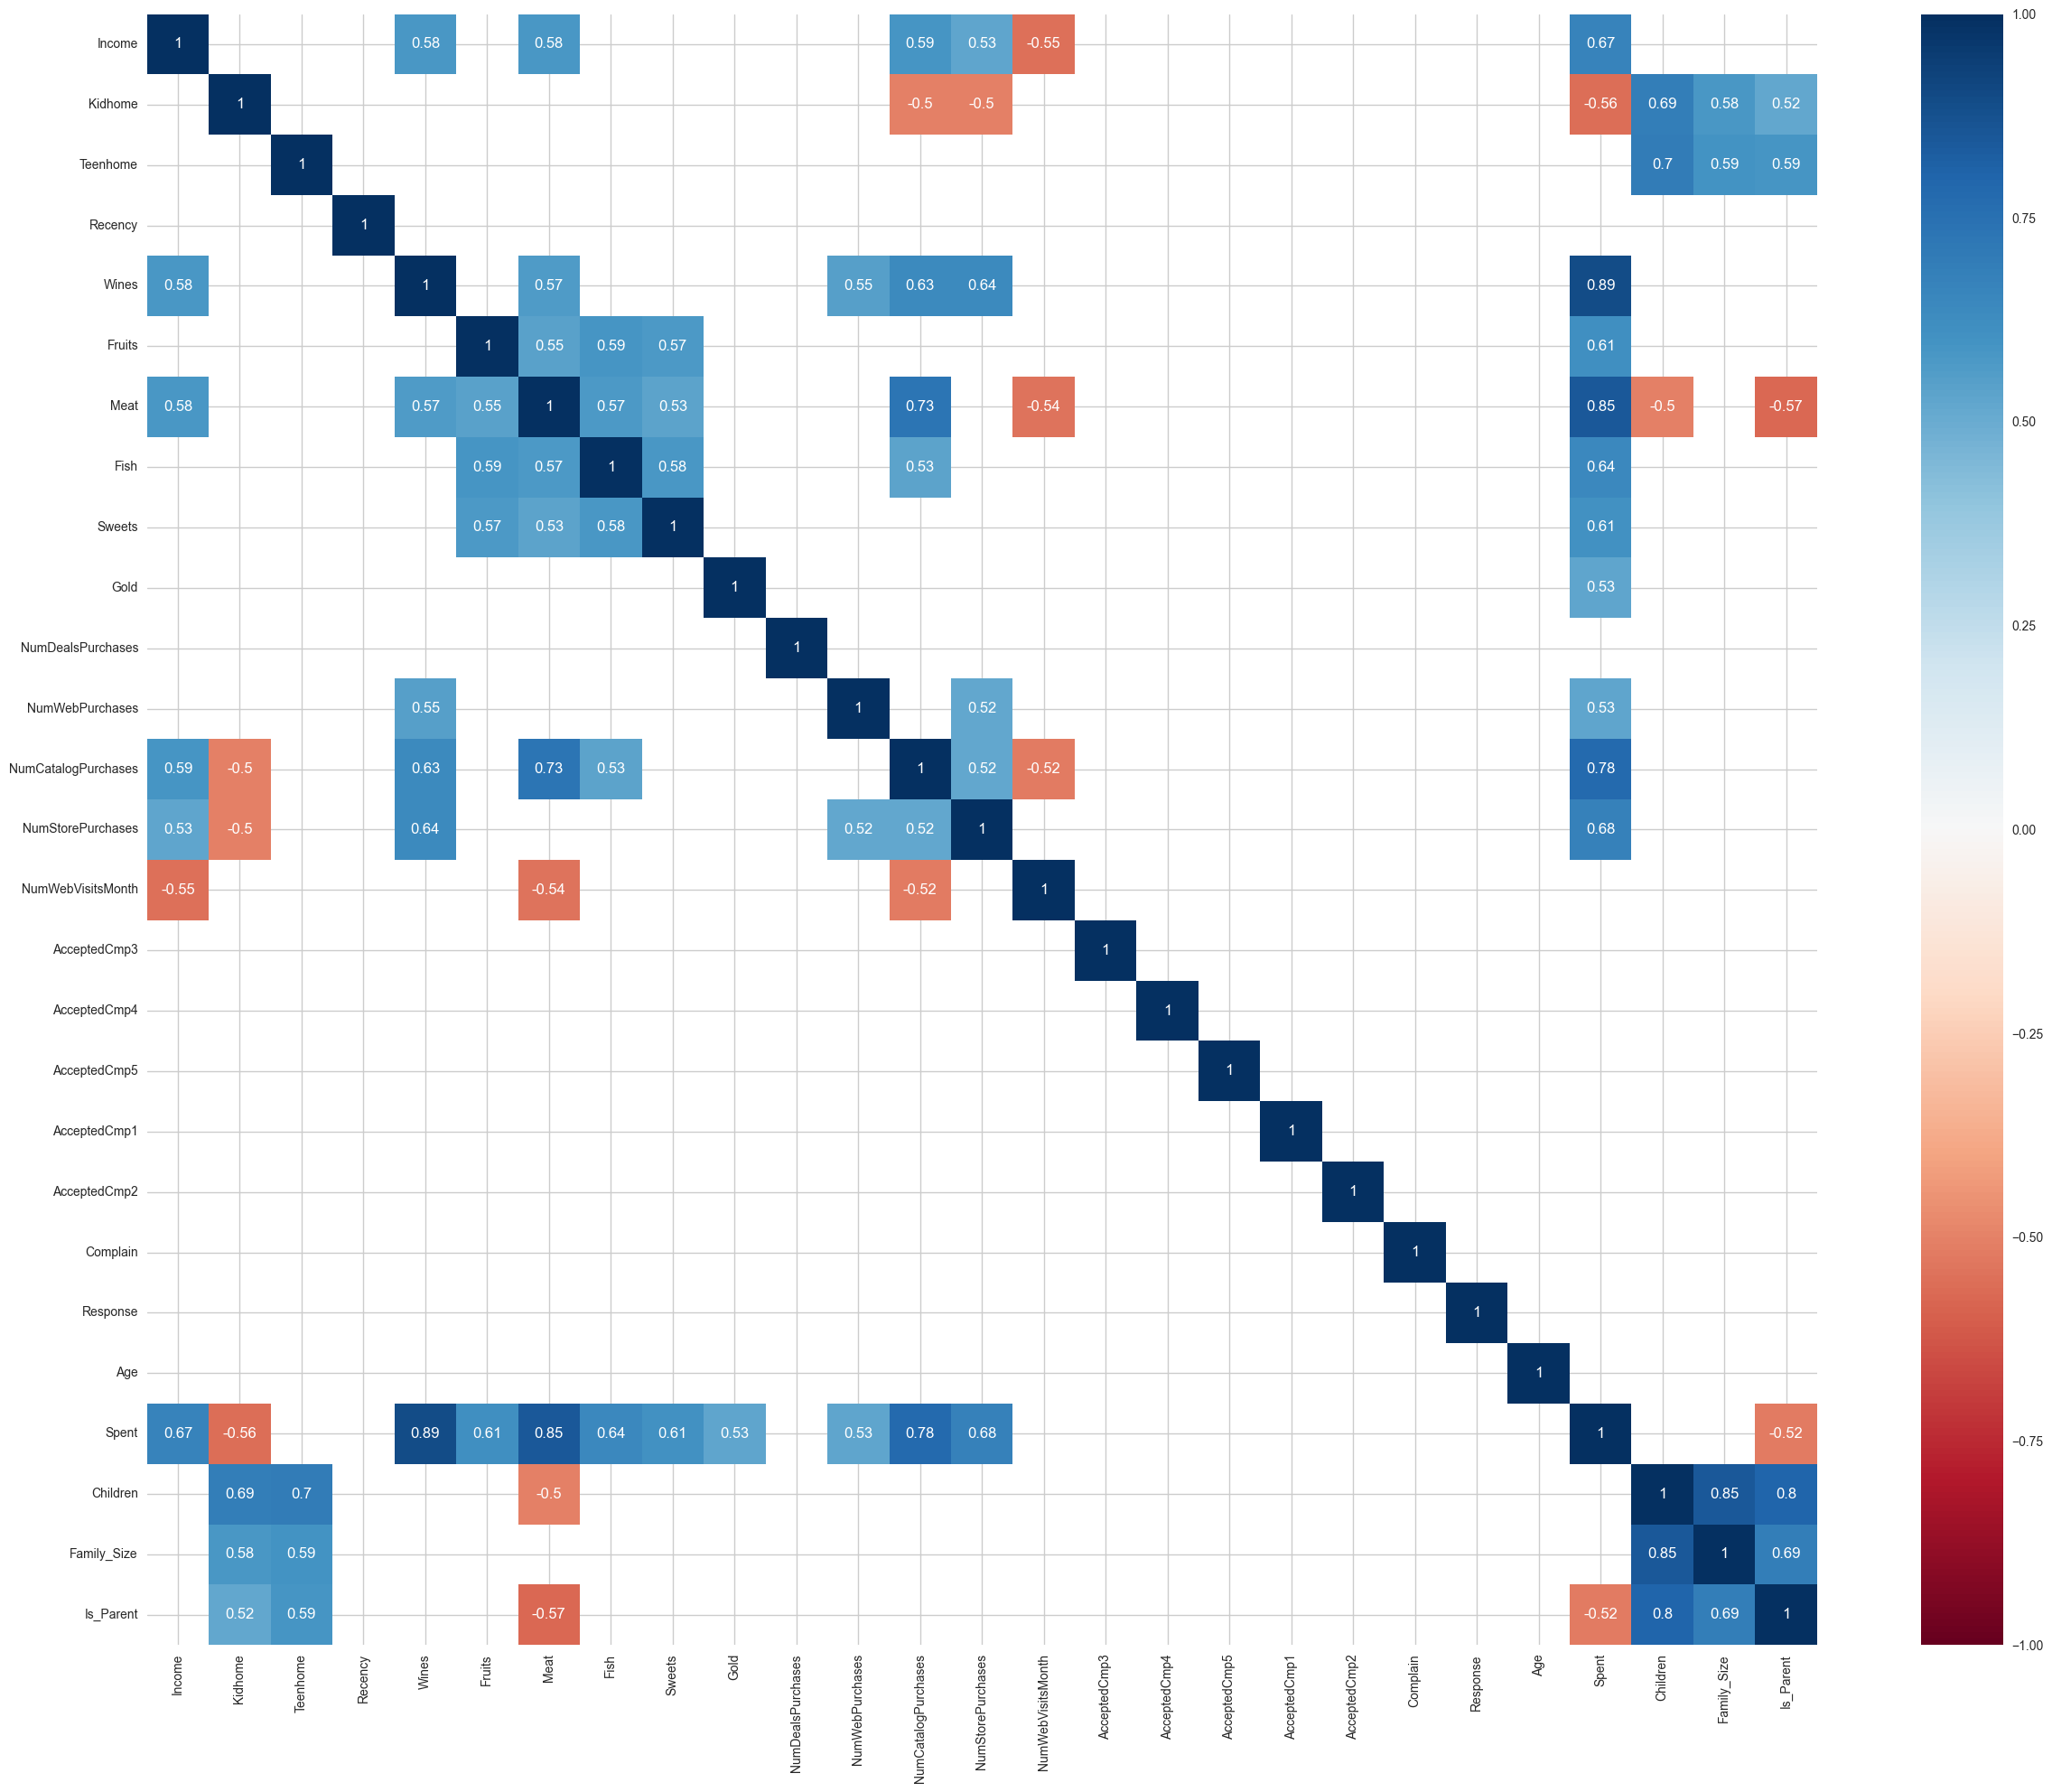

In [69]:
# lets check the correlation between the variables

corr_mat=data.corr(numeric_only=True)

mask = (corr_mat < 0.5) & (corr_mat > -0.5)

plt.figure(figsize=(25,20))
sns.heatmap(corr_mat,mask=mask,annot=True,cmap='RdBu',vmin=-1,vmax=1)

plt.tight_layout()
plt.show()

### Based on the correlation matrix heatmap, here are the inferences:

** Highly Positively Correlated Variables:

* Income and Spent: These variables show a strong positive correlation, indicating that higher income is associated with higher spending.


** Highly Negatively Correlated Variables:

* Recency and Frequency: These variables are strongly negatively correlated, suggesting that more recent interactions are associated with lower frequency.


** Weakly Correlated Variables:

* Kid Home and MntWines: These variables show a weak correlation, indicating that the presence of kids at home does not significantly affect spending on wines.

### Data Preprocessing 

In [77]:
data.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int32
dtype: object

In [78]:
data.head(2)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,67,27,Alone,2,3,1


In [79]:
# list of categorical variables

# There are 2 columns in the data which we need to encode for further clustering.

s = (data.select_dtypes(include='object'))
object_cols = list(s)

print("Categorical variables in the dataset:", object_cols[0:])

Categorical variables in the dataset: ['Education', 'Living_With']


In [80]:
print(data['Education'].value_counts())

print(data['Living_With'].value_counts())

Education
Graduate         1116
Postgraduate      845
Undergraduate     252
Name: count, dtype: int64
Living_With
Partner    1429
Alone       784
Name: count, dtype: int64


### Feature Encoding 

In [81]:
# We can perform label encoding to these columns as they are in ordered.

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
data.head(2)


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,67,27,0,2,3,1


In [93]:
ds = data.copy()
del_col= ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

ds = ds.drop(del_col, axis=1)

In [94]:
ds.head(2)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,67,27,0,2,3,1


###  Feature Scaling

In [152]:
# Scaling the data


sc=StandardScaler()

data_s=pd.DataFrame(sc.fit_transform(ds),columns=ds.columns)

In [153]:
data_s.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893223,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,...,1.427316,2.504247,-0.555456,0.692198,1.018785,1.676723,-1.350076,-1.264914,-1.758879,-1.581639
1,-0.893223,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,...,-1.126455,-0.571168,-1.170837,-0.132699,1.275248,-0.962927,-1.350076,1.404857,0.448948,0.632255
2,-0.893223,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,...,1.427316,-0.229456,1.290688,-0.545148,0.334882,0.280531,0.740699,-1.264914,-0.654965,-1.581639
3,-0.893223,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,...,-0.761631,-0.912881,-0.555456,0.279749,-1.289387,-0.919763,0.740699,0.069971,0.448948,0.632255
4,0.572087,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,...,0.332842,0.112257,0.059925,-0.132699,-1.032923,-0.307165,0.740699,0.069971,0.448948,0.632255


### Dimension reduction PCA 

** Objective
* PCA aims to reduce the number of variables (or features) in a dataset while preserving as much information as possible.


** Method
* It achieves this by transforming the original variables into a new set of orthogonal variables called principal components.


** Components
* Principal components are ordered by the amount of variance they explain in the data, with the first component explaining the most variance, followed by the second, and so on.

In [120]:
# Computes the covariance matrix of transpose of data

cov_mat=np.cov(data_s.T)


print('The shape of matrix is ',cov_mat.shape)

The shape of matrix is  (22, 22)


In [154]:
# Eigen value and Eigen Vector of the covariance matrix
# Eigen values represent variance explained by each eigen vector
# Eigen vector indicate prinical components

eig_val,eig_vec=np.linalg.eig(cov_mat)



In [158]:
data_s.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

### It transforms high-dimensional data (data_s) into a lower-dimensional space (data_pca) using PCA, facilitating easier analysis, visualization, and potentially improving the performance of machine learning models 

In [164]:


pca=PCA(n_components=22)
data_pca=pca.fit_transform(data_s)

data_pca=pd.DataFrame(data_pca,columns=range(1,23))

In [162]:
data_pca

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
1,4.971113,-0.328360,-1.144437,-1.481687,-0.978264,0.115678,-0.289943,0.588639,2.445168,-0.687676,...,0.313393,0.118805,0.862932,0.301301,0.511426,-0.144504,-0.494094,3.606386e-16,-1.136696e-15,3.878692e-15
2,-2.851391,0.164534,-0.728519,1.147121,-1.884621,-1.029614,0.612792,-0.373613,0.704938,0.096449,...,0.106631,-0.017866,-0.105031,0.008878,-0.022752,-0.212460,-0.162248,1.697079e-16,-3.093598e-16,1.554806e-15
3,2.589037,-0.680597,0.115830,0.358531,0.591449,-0.819141,-1.584004,0.354525,-0.407193,-0.909512,...,-0.129458,0.175520,1.155405,0.077787,-0.321223,-0.262745,-0.538852,-3.267861e-15,-1.016791e-15,2.716250e-15
4,-2.552660,-1.344173,1.142432,-0.818808,0.033547,-0.849899,-0.812724,-0.509680,-0.396089,-0.145372,...,-0.166663,-0.285244,0.012234,0.298164,0.164874,-0.101660,0.311995,7.751264e-16,2.370713e-17,-9.431957e-16
5,-0.656835,0.267947,1.255643,-1.371573,0.143981,1.626635,0.611148,-0.189696,0.028337,-0.433337,...,0.235925,0.616361,0.380850,0.262176,0.590135,-0.323879,0.333608,3.682523e-15,-2.122153e-16,-1.105284e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2.292668,2.463160,0.206326,-1.051042,-0.320702,-0.295520,-1.534503,1.968066,-0.654431,1.727872,...,1.571495,-0.255451,-1.348623,-0.206341,-0.320178,-0.627113,0.719460,3.099656e-15,1.397608e-15,-3.940798e-15
2210,-3.157726,4.194633,0.685990,-0.201850,0.454362,0.483490,0.902140,-0.792343,2.031711,-0.752881,...,0.615492,0.436950,0.036578,0.381287,-0.452924,-0.672200,-0.719768,-2.270964e-16,-1.783088e-15,5.809266e-15
2211,2.719555,-1.768135,-1.376714,-0.550456,-0.626136,1.429529,-0.593038,-1.427706,-1.150872,-0.699503,...,-1.914778,-0.518880,-0.531220,-1.046465,-0.023781,0.130265,-0.730228,-4.746387e-15,6.396612e-16,3.212558e-15
2212,1.459066,1.839684,0.187639,1.358882,0.974756,-1.278985,0.264219,0.386515,-0.324014,0.220018,...,-0.142481,-0.383554,0.467979,0.502168,0.462620,0.342435,0.174503,1.087377e-15,-5.955960e-17,-1.720352e-15


In [165]:
# Kaiser's criterion 
# eigen value
pca.explained_variance_

array([8.11197537e+00, 2.86962064e+00, 1.33196729e+00, 1.24989497e+00,
       1.08150578e+00, 9.91922960e-01, 9.31643295e-01, 8.35893789e-01,
       6.85325348e-01, 6.31268847e-01, 5.55306604e-01, 4.57521477e-01,
       4.45200174e-01, 4.09629555e-01, 3.88038889e-01, 3.25942335e-01,
       2.70399160e-01, 2.36914073e-01, 1.99975188e-01, 1.88042472e-15,
       8.65493007e-17, 0.00000000e+00])

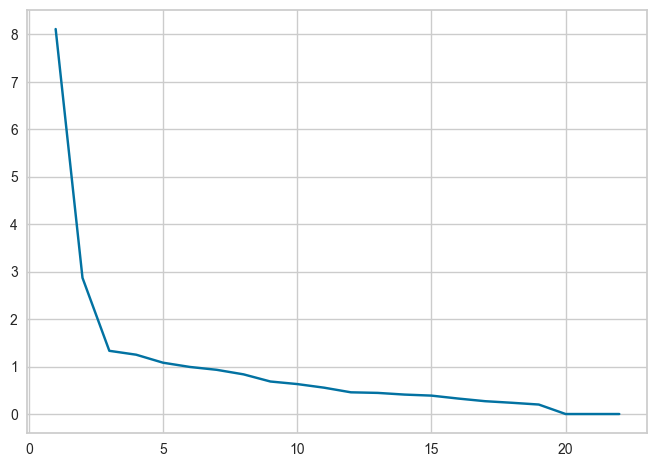

In [167]:
#Scree plot

plt.plot(range(1,23),pca.explained_variance_)
plt.show()

In [168]:
# Total explainced variances

np.cumsum(pca.explained_variance_ratio_)

array([0.36855954, 0.4989379 , 0.5594545 , 0.61624224, 0.66537938,
       0.71044641, 0.7527747 , 0.7907527 , 0.82188978, 0.85057085,
       0.87580065, 0.89658769, 0.91681492, 0.93542603, 0.95305619,
       0.96786505, 0.98015037, 0.99091433, 1.        , 1.        ,
       1.        , 1.        ])

### By specifying n_components=13, PCA retains components that collectively explain 90% of the variance in the original data 

In [169]:


pca_final=PCA(n_components=13)

data_pca=pca_final.fit_transform(data_s)

data_pca=pd.DataFrame(data_pca,columns=range(1,14))

In [170]:
data_pca

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4.971113,-0.328360,-1.144437,-1.481687,-0.978264,0.115678,-0.289943,0.588639,2.445168,-0.687676,-0.577421,-1.330613,0.313393
1,-2.851391,0.164534,-0.728519,1.147121,-1.884621,-1.029614,0.612792,-0.373613,0.704938,0.096449,-0.421786,0.052583,0.106631
2,2.589037,-0.680597,0.115830,0.358531,0.591449,-0.819141,-1.584004,0.354525,-0.407193,-0.909512,-0.091602,1.359948,-0.129458
3,-2.552660,-1.344173,1.142432,-0.818808,0.033547,-0.849899,-0.812724,-0.509680,-0.396089,-0.145372,0.210768,0.269225,-0.166663
4,-0.656835,0.267947,1.255643,-1.371573,0.143981,1.626635,0.611148,-0.189696,0.028337,-0.433337,0.845525,0.836448,0.235925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2.292668,2.463160,0.206326,-1.051042,-0.320702,-0.295520,-1.534503,1.968066,-0.654431,1.727872,-1.499116,-0.829754,1.571495
2209,-3.157726,4.194633,0.685990,-0.201850,0.454362,0.483490,0.902140,-0.792343,2.031711,-0.752881,-0.910971,1.651144,0.615492
2210,2.719555,-1.768135,-1.376714,-0.550456,-0.626136,1.429529,-0.593038,-1.427706,-1.150872,-0.699503,0.177768,0.548138,-1.914778
2211,1.459066,1.839684,0.187639,1.358882,0.974756,-1.278985,0.264219,0.386515,-0.324014,0.220018,0.118823,0.291429,-0.142481


In [171]:
# Total explained variances

np.cumsum(pca_final.explained_variance_ratio_)

array([0.36855954, 0.4989379 , 0.5594545 , 0.61624224, 0.66537938,
       0.71044641, 0.7527747 , 0.7907527 , 0.82188978, 0.85057085,
       0.87580065, 0.89658769, 0.91681492])

### Clustering

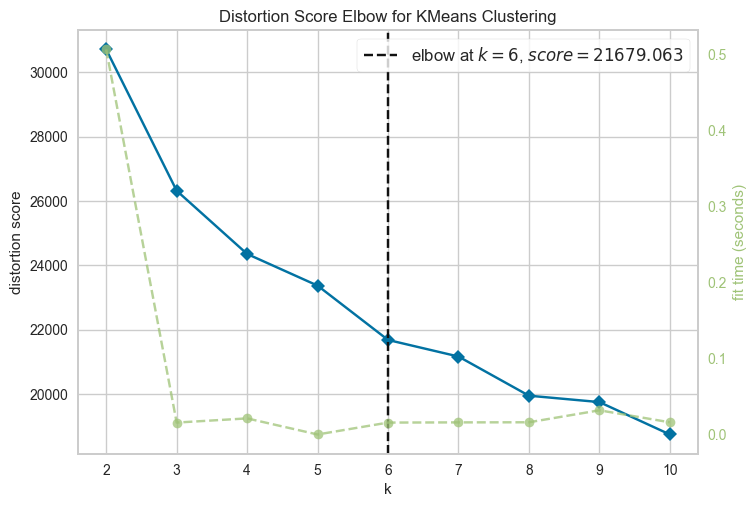

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
# lets make a elbow plot

k_elbow=KElbowVisualizer(KMeans(),k=10)
k_elbow.fit(data_pca)
k_elbow.show()

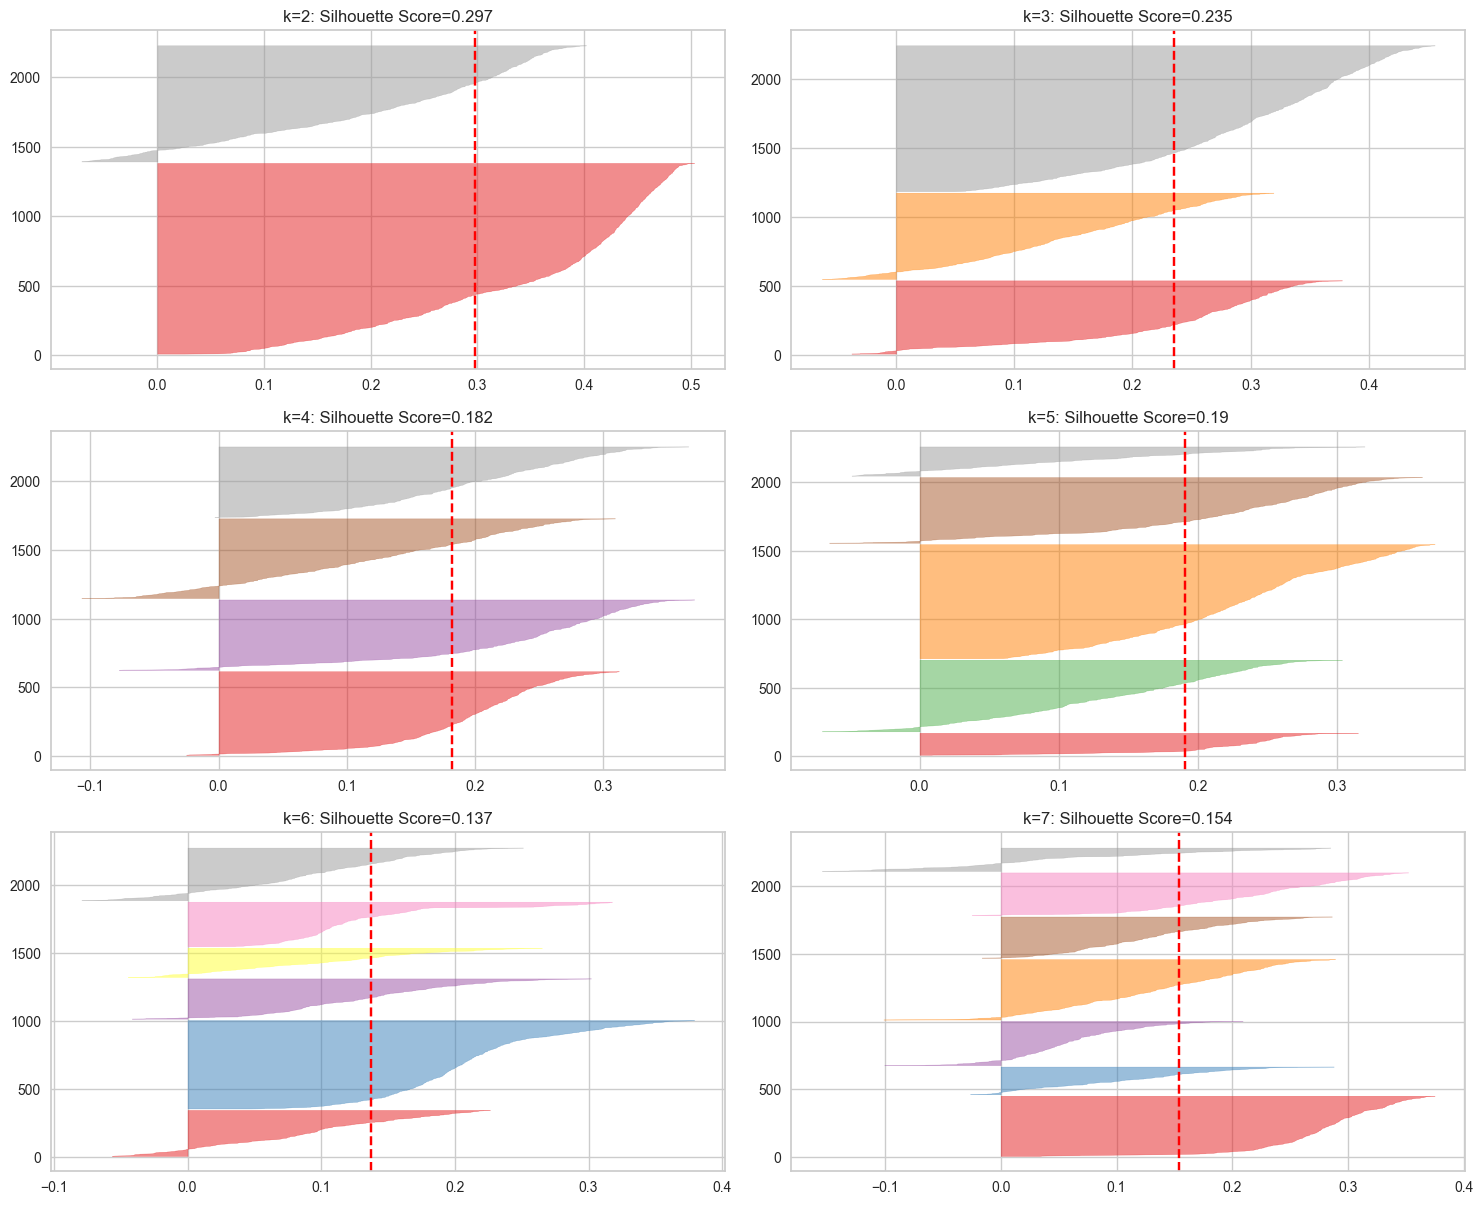

In [176]:
# Silhouette Visualizer

t=1
plt.figure(figsize=(15,20))
for i in range(2,8):
    plt.subplot(5,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f'k={i}: Silhouette Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

In [177]:
# Lets go with k = 2

final_kmean=KMeans(n_clusters=2)
kmean_pred=final_kmean.fit_predict(data_pca)

In [178]:
kmean_pred

array([0, 1, 0, ..., 0, 0, 1])

###  Business Interpretations

In [179]:
data['Kmean label']=kmean_pred

In [180]:
data.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Kmean label
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,64,1617,0,0,1,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,67,27,0,2,3,1,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,56,776,1,0,2,0,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,37,53,1,1,3,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,40,422,1,1,3,1,1


In [181]:
data['Kmean label'].value_counts()

Kmean label
1    1381
0     832
Name: count, dtype: int64

In [182]:
data.groupby(by='Kmean label').mean()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
Kmean label,,,,,,,,,,,,,,,,,,,,,
0,0.549279,72646.955529,0.051683,0.365385,49.393029,604.706731,58.129808,375.450721,83.647837,60.102163,...,0.156250,0.028846,0.008413,0.231971,53.706731,1258.534856,0.616587,0.417067,2.033654,0.394231
1,0.645909,39940.107169,0.677046,0.590152,48.775525,124.684287,7.162201,41.356264,9.914555,7.112962,...,0.008689,0.004345,0.009413,0.101376,51.104272,214.509776,0.663287,1.267198,2.930485,0.907314


In [183]:
silhouette_score(data_pca,kmean_pred)

0.2980560780350584

In [185]:
# Visualize these cluster

centroid=final_kmean.cluster_centers_


centroid

array([[ 3.22263441,  0.21374366,  0.06850409, -0.02796656, -0.01354316,
        -0.0073521 ,  0.05240214, -0.01668147, -0.0177356 , -0.0155164 ,
        -0.06112941,  0.00642369, -0.02522964],
       [-1.94151472, -0.12877243, -0.04127111,  0.01684879,  0.00815924,
         0.00442936, -0.0315703 ,  0.01004995,  0.01068503,  0.00934804,
         0.03682815, -0.00387003,  0.0151999 ]])

In [187]:
# Lets check centroids

print(centroid[0][0])
print(centroid[0][1])
print(centroid[0][2])

3.222634409532417
0.21374366146567383
0.06850409072821104


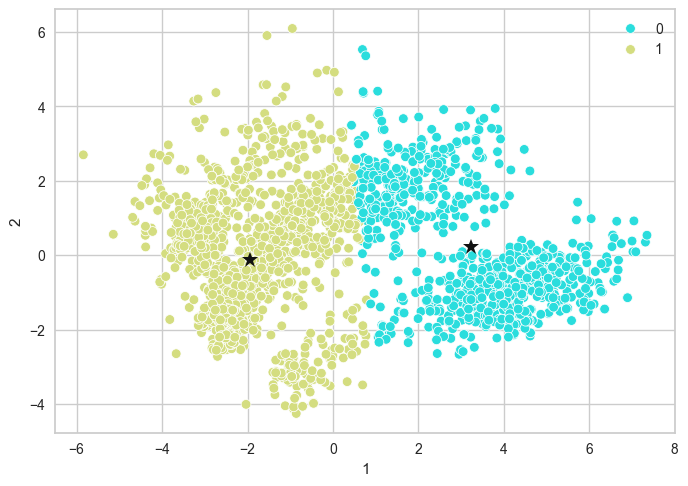

In [191]:
# lets plot these centroids


sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=kmean_pred,palette='rainbow')

for i in range(2):
    plt.plot(centroid[i][0],centroid[i][1],marker='*',ms=12,color='k')

### Here we can also apply agglomerative clustering to check which is better  

In [193]:
# Distance matrix

dist_mat=euclidean_distances(data_pca)
print('The shape of distance matrix: ',dist_mat.shape)

The shape of distance matrix:  (2213, 2213)


In [194]:
# Linkage

link_mat=linkage(dist_mat,method='ward')

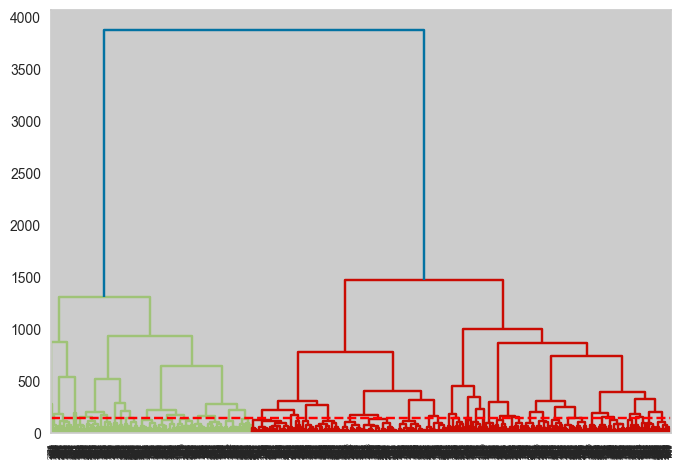

In [196]:
# Lets plot the dendrogram to decide the value of k

# Dendrogram 

# This dendrogram is also showing the calue 2 for k

dendrogram(link_mat)
plt.axhline(y=150,color='red',ls='--')
plt.show()

In [197]:
# Lets build the model 

final_agg=AgglomerativeClustering(n_clusters=2)

In [198]:
agglo_pred=final_agg.fit_predict(data_pca)

In [199]:
silhouette_score(data_pca,agglo_pred)

0.25396155319177777

<Axes: xlabel='1', ylabel='2'>

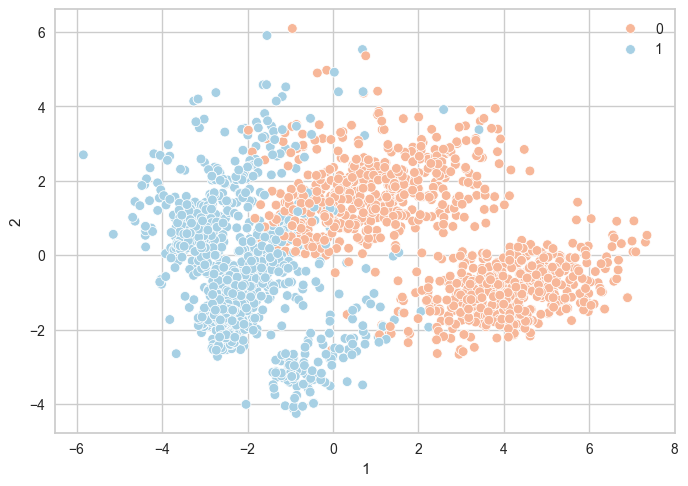

In [201]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=agglo_pred,palette='RdBu')


In [202]:
data.groupby(by='Kmean label').mean()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
Kmean label,,,,,,,,,,,,,,,,,,,,,
0,0.549279,72646.955529,0.051683,0.365385,49.393029,604.706731,58.129808,375.450721,83.647837,60.102163,...,0.156250,0.028846,0.008413,0.231971,53.706731,1258.534856,0.616587,0.417067,2.033654,0.394231
1,0.645909,39940.107169,0.677046,0.590152,48.775525,124.684287,7.162201,41.356264,9.914555,7.112962,...,0.008689,0.004345,0.009413,0.101376,51.104272,214.509776,0.663287,1.267198,2.930485,0.907314


### Interpretation from the clusters

## Cluster 0 Interpretation:

Demographics and Lifestyle:

* Education: Moderate level.
* Income: Relatively high (72,646 on average).
* Household Composition: Few children at home (Kidhome: 5.2%).
* Age and Recency: Average age around 53.7 years, with recent customer activity.


** Product Preferences:

* High Consumption:
* Wines: Significant expenditure (604.71).
* Meat: Considerable spending (375.45).
* Fish: Moderate spending (83.65).
* Moderate Consumption:
* Fruits: Reasonable expenditure (58.13).
* Sweets: Moderate spending (60.10).

** Campaign Response:

* Accepted Campaigns: Generally responsive to marketing campaigns (AcceptedCmp1: 15.63%, AcceptedCmp2: 2.88%).
* Complaints: Low complaint rate (0.84%).
* Response Rate: Higher likelihood to respond positively to promotions (Response: 23.20%).

** Family and Living:
* Living Arrangement: Often living with children (61.66%).
* Family Size: Average of 2.03 persons.
* Parental Status: Many are parents (39.42%).


## Cluster 1 Interpretation:


** Demographics and Lifestyle:

* Education: Lower to moderate education levels.
* Income: Lower income bracket (39,940 on average).
* Household Composition: Higher presence of children (Kidhome: 67.70%, Teenhome: 59.02%).
* Age and Recency: Average age around 51.10 years, with recent customer activity.

** Product Preferences:

* High Consumption:
* Wines: Lower expenditure (124.68).
* Meat: Lower spending (41.36).
* Moderate Consumption:
* Fruits: Minimal spending (7.16).
* Sweets: Minimal spending (7.11).

** Campaign Response:
* Accepted Campaigns: Lower acceptance rates (AcceptedCmp1: 0.87%, AcceptedCmp2: 0.43%).
* Complaints: Low complaint rate (0.94%).
* Response Rate: Lower likelihood to respond positively to promotions (Response: 10.14%).

** Family and Living:
* Living Arrangement: Generally living with children (66.33%).
* Family Size: Larger families (average of 2.93 persons).
* Parental Status: Mostly parents (90.73%).

### Keys which business should focus:


** Targeted Marketing Campaigns:

* Cluster 0: Focus on wine and meat promotions with targeted messaging to families.
* Cluster 1: Emphasize affordability and family-oriented products like fruits and basic meat cuts.

** Customer Engagement:

* Cluster 0: Engage with personalized offers due to higher income and responsiveness.
* Cluster 1: Offer promotions appealing to family needs and budget constraints.

** Product Development:

* Cluster 0: Introduce premium wine and meat selections.
* Cluster 1: Develop cost-effective family packs for basic necessities.


** Customer Service:

* Cluster 0: Ensure high service levels to maintain low complaint rates.
* Cluster 1: Address family-specific concerns and preferences.


** Market Expansion:

* Cluster 0: Target affluent suburban areas with established family households.
* Cluster 1: Focus on urban areas with middle-income families.


** Retention Strategies:

* Cluster 0: Loyalty programs for frequent wine and meat purchases.
* Cluster 1: Value-added services for family-centric shopping convenience.